- Clustering, o análisis de agrupamiento, es una técnica de aprendizaje no supervisado que tiene como objetivo dividir un conjunto de datos en grupos o "clusters" de objetos similares. Las estrategias de clustering se refieren a las diferentes técnicas y algoritmos utilizados para llevar a cabo este proceso de agrupación.

### Aquí hay algunas estrategias comunes de clustering:

## K-Means Clustering: 
- Este es uno de los algoritmos de clustering más populares. Divide los datos en K grupos donde K es un número predefinido. Cada grupo se representa por su centroide, que es el punto medio de todos los puntos en ese grupo. K-Means se basa en minimizar la distancia entre los puntos de datos y sus centroides.

== Ejemplo: Si tienes datos de clientes de un banco, K-Means podría ayudarte a agruparlos en diferentes segmentos según sus hábitos de gasto y ahorro.

### DBSCAN (Agrupación espacial de aplicaciones con ruido basada en densidad): 
- A diferencia de K-Means, DBSCAN no requiere que definas el número de clusters de antemano. En su lugar, identifique grupos basados ​​en la densidad de los datos. Los puntos densos forman un grupo, y los puntos aislados se consideran ruido.

= Ejemplo: DBSCAN podría utilizarse para identificar áreas densamente pobladas en un mapa en función de la densidad de población.

## Clustering Jerárquico: 
- Este enfoque crea una estructura de árbol de clusters en la que los clusters se pueden subdividir en subclusters. Puedes elegir cuántos racimos finales deseas identificar al cortar el árbol en un nivel específico.

=Ejemplo: Clustering jerárquico podría usarse para agrupar documentos en un corpus en categorías, subcategorías y temas.

## Clustering Espectral: 
- Este método se basa en las propiedades del espectro de afinidad, que captura la similitud entre puntos de datos. Es efectivo para encontrar clusters no convexos y puede manejar datos de alta dimensionalidad.

= Ejemplo: Clustering espectral se aplica en análisis de redes sociales para detectar comunidades de usuarios con intereses similares.

## Clustering Basado en Modelos: 
- Utiliza modelos probabilísticos para describir cómo los datos podrían haber sido generados. El algoritmo EM (Expectation-Maximization) es un ejemplo de este enfoque.

<Ejemplo: Clustering basado en modelos se usa en la segmentación de clientes en marketing para identificar perfiles de clientes basados ​​en patrones de compra.>

- Las estrategias de clustering pueden variar en complejidad y aplicabilidad según el problema. La elección del algoritmo adecuado depende de la naturaleza de los datos y de los objetivos del análisis. Cada uno de estos métodos puede proporcionar información valiosa sobre la estructura subyacente de tus datos y ayudarte a tomar decisiones basadas en esa estructura.

**El problema del clustering se refiere a la tarea de agrupar datos en conjuntos o clusters similares en función de ciertas características o similitudes. Este es un problema fundamental en el análisis de datos y la minería de datos. Aquí están las tres afirmaciones mencionadas:**

### No conocemos con anterioridad las etiquetas de nuestros datos (Aprendizaje no supervisado): 
- En el aprendizaje no supervisado, no tenemos etiquetas o categorías previamente definidas para nuestros datos. En otras palabras, no sabemos cómo deberían agruparse los datos de antemano. El objetivo es descubrir estructuras subyacentes en los datos sin una guía externa.

- Ejemplo: Si tienes un conjunto de datos de noticias, no sabes de antemano las categorías a las que pertenecen las noticias. Usando clustering, puedes agrupar las noticias en categorías como deportes, política, entretenimiento, etc., sin etiquetas predefinidas.

### Queremos descubrir patrones ocultos a simple vista: 
- Los datos pueden contener patrones o estructuras que no son evidentes a simple vista. El clustering es una herramienta que nos permite identificar y explorar estos patrones ocultos.

- Ejemplo: Supongamos que tienes datos de ventas en una tienda y quieres entender cómo los clientes compran productos. El clustering podría revelar grupos de productos que tienden a venderse juntos, lo que podría impulsar estrategias de marketing cruzadas.

### Queremos identificar datos atípicos: 
- El clustering no solo se utiliza para agrupar datos similares, sino también para identificar datos atípicos o valores anómalos. Estos son puntos de datos que se desvían significativamente del comportamiento típico del conjunto de datos ya menudo son de interés especial.

- Ejemplo: En el monitoreo de redes, se pueden utilizar técnicas de clustering para identificar dispositivos o conexiones que están generando tráfico anormal o sospechoso. Estos podrían ser indicativos de ataques cibernéticos.

## En resumen, 
**El clustering es una técnica de aprendizaje no supervisado que se utiliza cuando no tenemos etiquetas para nuestros datos y queremos descubrir patrones ocultos y posiblemente identificar datos inusuales en un conjunto de datos. Puede aplicarse en una amplia variedad de dominios, desde segmentación de clientes hasta análisis de imágenes médicas y detección de fraudes.**

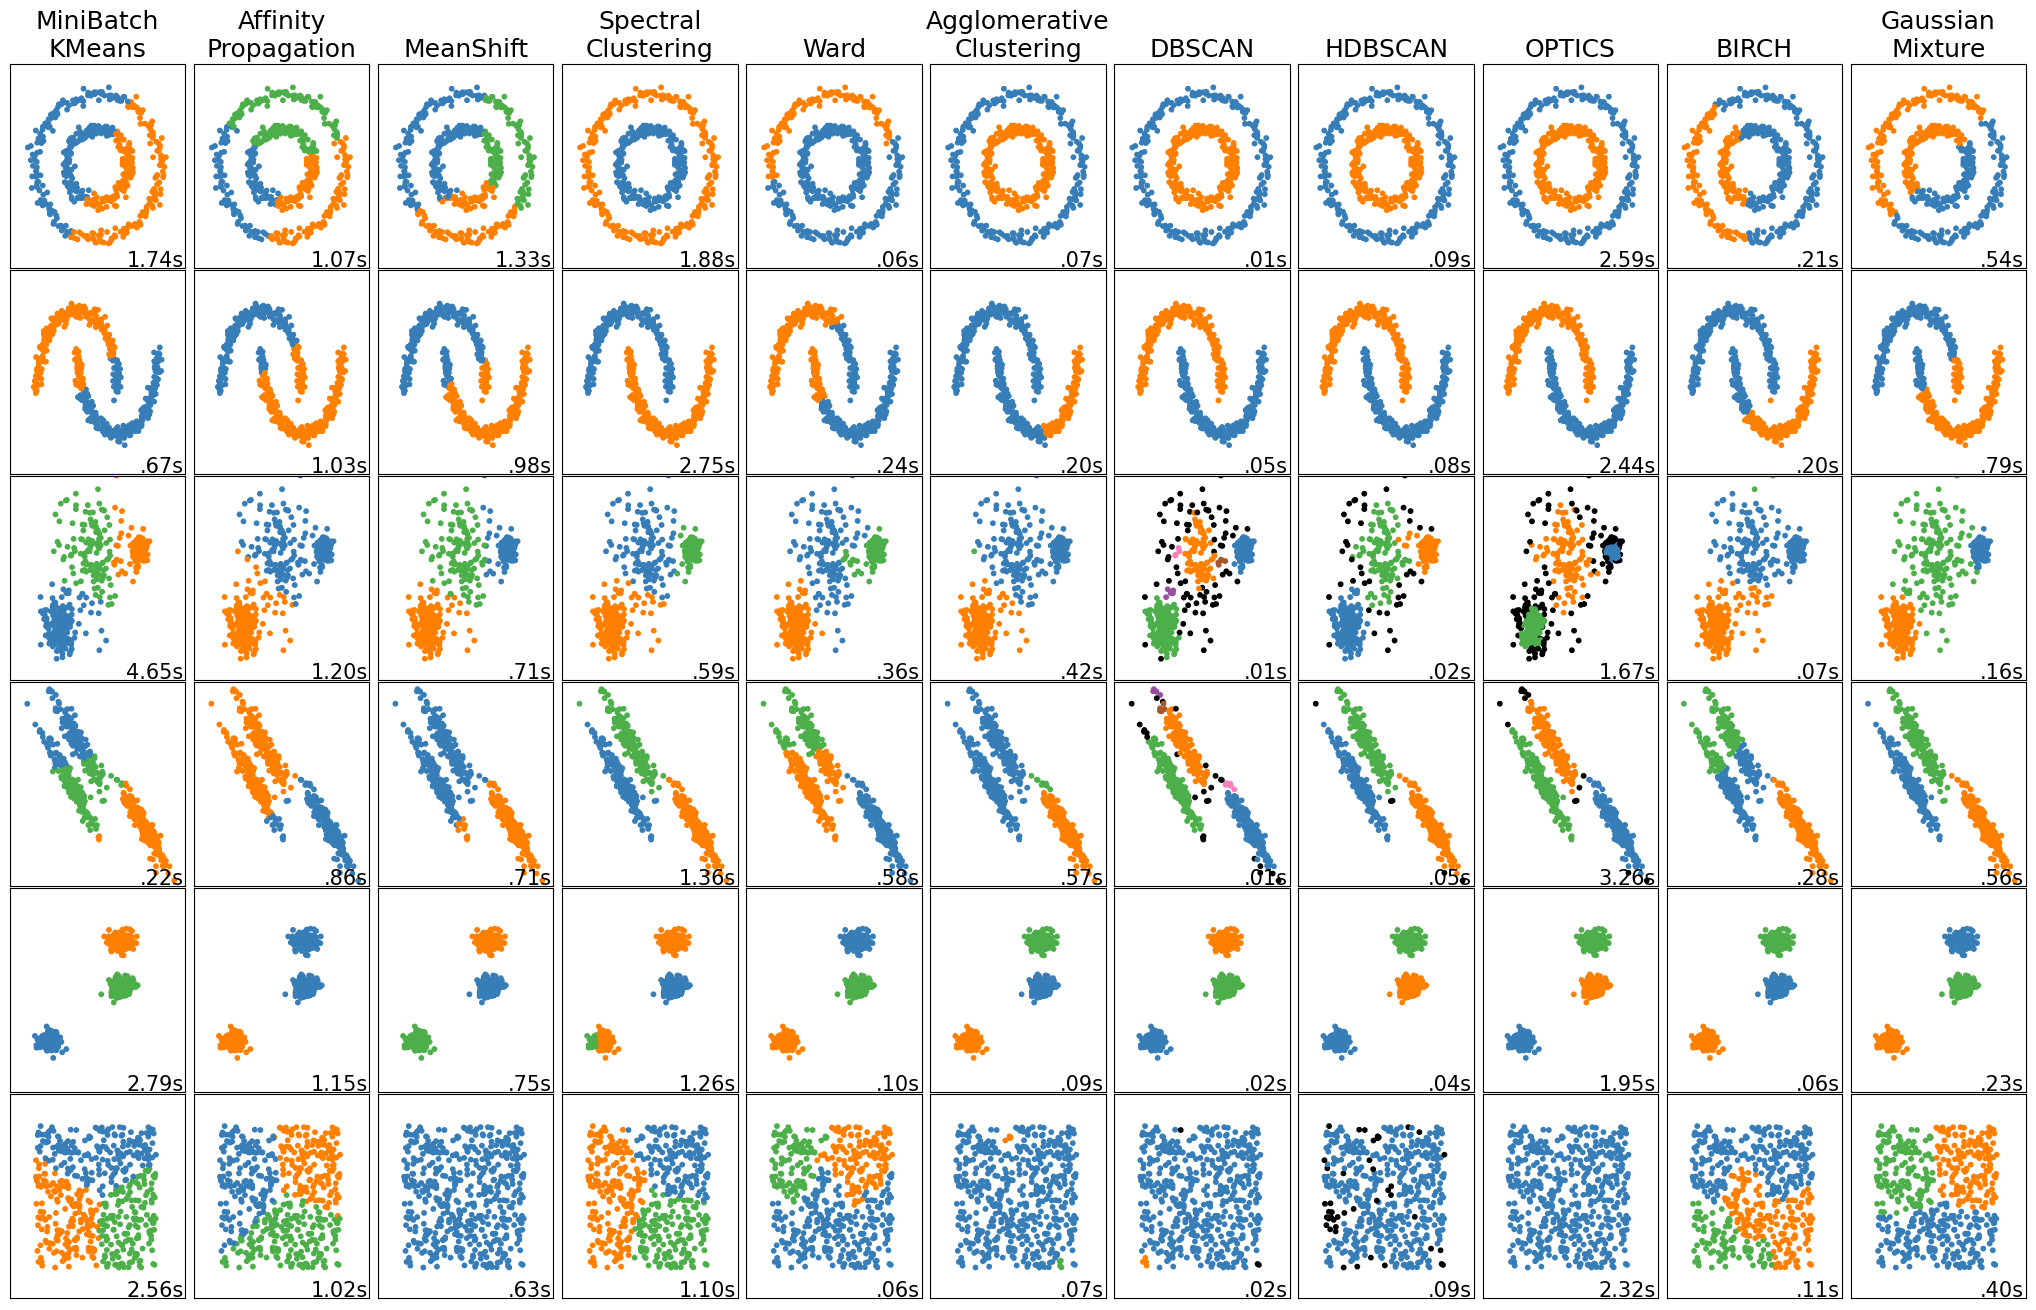

In [1]:
import time
import warnings
from itertools import cycle, islice

import matplotlib.pyplot as plt
import numpy as np

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9 * 2 + 3, 13))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.95, wspace=0.05, hspace=0.01
)

plot_num = 1

default_base = {
    "quantile": 0.3,
    "eps": 0.3,
    "damping": 0.9,
    "preference": -200,
    "n_neighbors": 3,
    "n_clusters": 3,
    "min_samples": 7,
    "xi": 0.05,
    "min_cluster_size": 0.1,
    "allow_single_cluster": True,
    "hdbscan_min_cluster_size": 15,
    "hdbscan_min_samples": 3,
}

datasets = [
    (
        noisy_circles,
        {
            "damping": 0.77,
            "preference": -240,
            "quantile": 0.2,
            "n_clusters": 2,
            "min_samples": 7,
            "xi": 0.08,
        },
    ),
    (
        noisy_moons,
        {
            "damping": 0.75,
            "preference": -220,
            "n_clusters": 2,
            "min_samples": 7,
            "xi": 0.1,
        },
    ),
    (
        varied,
        {
            "eps": 0.18,
            "n_neighbors": 2,
            "min_samples": 7,
            "xi": 0.01,
            "min_cluster_size": 0.2,
        },
    ),
    (
        aniso,
        {
            "eps": 0.15,
            "n_neighbors": 2,
            "min_samples": 7,
            "xi": 0.1,
            "min_cluster_size": 0.2,
        },
    ),
    (blobs, {"min_samples": 7, "xi": 0.1, "min_cluster_size": 0.2}),
    (no_structure, {}),
]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params["quantile"])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params["n_neighbors"], include_self=False
    )
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means = cluster.MiniBatchKMeans(n_clusters=params["n_clusters"], n_init="auto")
    ward = cluster.AgglomerativeClustering(
        n_clusters=params["n_clusters"], linkage="ward", connectivity=connectivity
    )
    spectral = cluster.SpectralClustering(
        n_clusters=params["n_clusters"],
        eigen_solver="arpack",
        affinity="nearest_neighbors",
    )
    dbscan = cluster.DBSCAN(eps=params["eps"])
    hdbscan = cluster.HDBSCAN(
        min_samples=params["hdbscan_min_samples"],
        min_cluster_size=params["hdbscan_min_cluster_size"],
        allow_single_cluster=params["allow_single_cluster"],
    )
    optics = cluster.OPTICS(
        min_samples=params["min_samples"],
        xi=params["xi"],
        min_cluster_size=params["min_cluster_size"],
    )
    affinity_propagation = cluster.AffinityPropagation(
        damping=params["damping"], preference=params["preference"], random_state=0
    )
    average_linkage = cluster.AgglomerativeClustering(
        linkage="average",
        metric="cityblock",
        n_clusters=params["n_clusters"],
        connectivity=connectivity,
    )
    birch = cluster.Birch(n_clusters=params["n_clusters"])
    gmm = mixture.GaussianMixture(
        n_components=params["n_clusters"], covariance_type="full"
    )

    clustering_algorithms = (
        ("MiniBatch\nKMeans", two_means),
        ("Affinity\nPropagation", affinity_propagation),
        ("MeanShift", ms),
        ("Spectral\nClustering", spectral),
        ("Ward", ward),
        ("Agglomerative\nClustering", average_linkage),
        ("DBSCAN", dbscan),
        ("HDBSCAN", hdbscan),
        ("OPTICS", optics),
        ("BIRCH", birch),
        ("Gaussian\nMixture", gmm),
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the "
                + "connectivity matrix is [0-9]{1,2}"
                + " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning,
            )
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding"
                + " may not work as expected.",
                category=UserWarning,
            )
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, "labels_"):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(
            list(
                islice(
                    cycle(
                        [
                            "#377eb8",
                            "#ff7f00",
                            "#4daf4a",
                            "#f781bf",
                            "#a65628",
                            "#984ea3",
                            "#999999",
                            "#e41a1c",
                            "#dede00",
                        ]
                    ),
                    int(max(y_pred) + 1),
                )
            )
        )
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(
            0.99,
            0.01,
            ("%.2fs" % (t1 - t0)).lstrip("0"),
            transform=plt.gca().transAxes,
            size=15,
            horizontalalignment="right",
        )
        plot_num += 1

plt.show()

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib_inline
import matplotlib.pylab 



In [7]:
# Lee el archivo CSV y carga los datos en un DataFrame
df = pd.read_csv('/home/jhonfypy/CursoML_Scikit_learni_jf/candy.csv')

# Ahora, df contiene los datos del archivo CSV
# Puedes acceder a las columnas y realizar análisis de datos

# Por ejemplo, puedes imprimir las primeras filas del DataFrame
print(df.head())


  competitorname  chocolate  fruity  caramel  peanutyalmondy  nougat  \
0      100 Grand          1       0        1               0       0   
1   3 Musketeers          1       0        0               0       1   
2       One dime          0       0        0               0       0   
3    One quarter          0       0        0               0       0   
4      Air Heads          0       1        0               0       0   

   crispedricewafer  hard  bar  pluribus  sugarpercent  pricepercent  \
0                 1     0    1         0         0.732         0.860   
1                 0     0    1         0         0.604         0.511   
2                 0     0    0         0         0.011         0.116   
3                 0     0    0         0         0.011         0.511   
4                 0     0    0         0         0.906         0.511   

   winpercent  
0   66.971725  
1   67.602936  
2   32.261086  
3   46.116505  
4   52.341465  


In [2]:
sns.pairplot(df[['sugarpercent','pricepercent','winpercent','group']], hue = 'chocolate')

NameError: name 'sns' is not defined